# Supplementary Information

This notebook contains the code to generate all plots for the supplementary information

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Notebook contents

1. [Example sMD results](#1.-Example-sMD-results)
2. [sMD CV target values](#2.-sMD-CV-target-values)
3. [Hinge and PBC Hbonds](#3.-Hinge-and-PBC-Hbonds)
4. [cAMP Hbonds with L273W](#4.-cAMP-Hbonds-with-L273W)
5. [I942 internal dihedrals](#5.-I942-internal-dihedrals)

## 1. Example sMD results

[top](#Supplementary-Information)

#### inactive to active

In [2]:
data1 = pd.read_csv('../systems/apo/inactive/seeded-md_2step/steering/steering_1.dat', delim_whitespace=True).iloc[:,1:12000]
data2 = pd.read_csv('../systems/apo/inactive/seeded-md_2step/steering/steering_2.dat', delim_whitespace=True).iloc[:,1:]
data = pd.concat([data1, data2], ignore_index=True)
columns = data.columns[2:]
data = data.iloc[:,:-2]
data.columns = columns
data.index = data.index*0.005

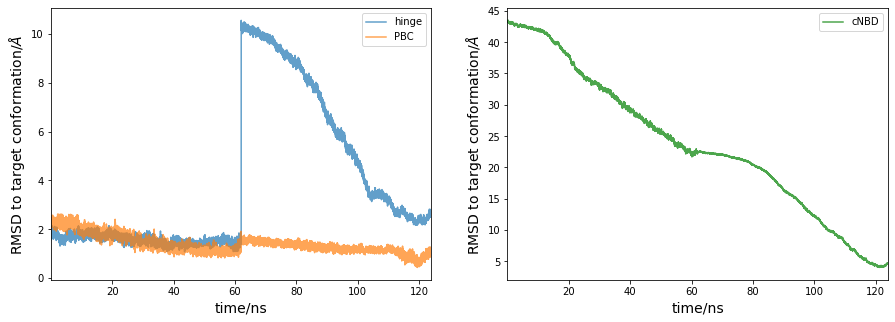

In [3]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(data.index, data['hinge']*10, alpha=0.7, label='hinge')
ax[0].plot(data.index, data['pbc']*10, alpha=0.7, label='PBC')
ax[1].plot(data.index, data['cnbd']*10, alpha=0.7, label='cNBD', color='green')

for i in range(2):
    ax[i].legend()
    ax[i].set_xlim(data.index[1], data.index[-1])
    ax[i].set_xlabel('time/ns', size=14)
    ax[i].set_ylabel(f'RMSD to target conformation/$\AA$', size=14)

#### active to inactive

In [4]:
data1 = pd.read_csv('../systems/apo/active/seeded-md_2step/steering/steering_1.dat', delim_whitespace=True).iloc[:,1:12000]
data2 = pd.read_csv('../systems/apo/active/seeded-md_2step/steering/steering_2.dat', delim_whitespace=True).iloc[:,1:]
data = pd.concat([data1, data2], ignore_index=True)
columns = data.columns[2:]
data = data.iloc[:,:-2]
data.columns = columns
data.index = data.index*0.005

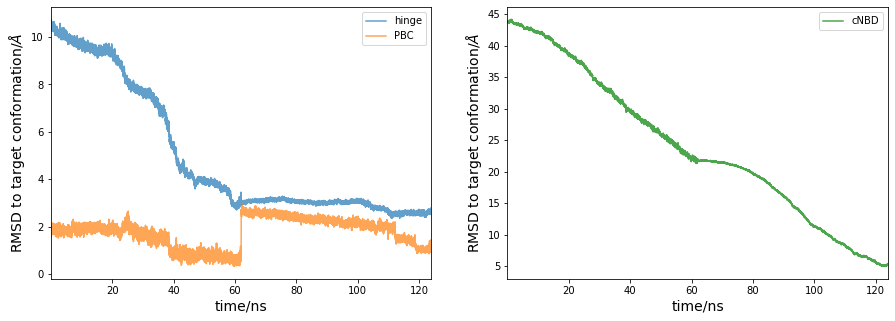

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(data.index, data['hinge']*10, alpha=0.7, label='hinge')
ax[0].plot(data.index, data['pbc']*10, alpha=0.7, label='PBC')
ax[1].plot(data.index, data['cnbd']*10, alpha=0.7, label='cNBD', color='green')

for i in range(2):
    ax[i].legend()
    ax[i].set_xlim(data.index[1], data.index[-1])
    ax[i].set_xlabel('time/ns', size=14)
    ax[i].set_ylabel(f'RMSD to target conformation/$\AA$', size=14)

## 2. sMD CV target values

[top](#Supplementary-Information)

#### From 1 $\mu$s equilibrium MD:

In [6]:
files = ['domain_angle.txt', 'hinge.txt', 'pbc.txt']
states= ['active', 'inactive']
features = ['Domain angle/$^{o}$', 'hinge RMSD/$\AA$', 'PBC RMSD/$\AA$']

eq_data = []

for state in states:
    state_data = []
    for file in files:
        data = np.loadtxt(f'../systems/apo/{state}/equilibrium/{file}')
        state_data.append(data[:,1])
    eq_data.append(state_data)

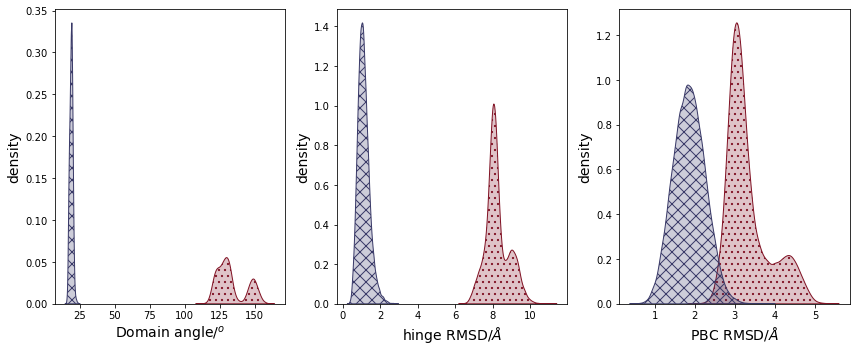

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

state_line = [80, 5, 2.8]
colors = [(114/225, 17/225, 33/225), (51/225, 51/225, 92/225)]
hatches = ['..', 'xx']

for i, state in enumerate(states):
    for j, file in enumerate(files):
        sns.kdeplot(eq_data[i][j], shade=True, ax=ax[j], label=state, hatch=hatches[i], color=colors[i])
        ax[j].set_xlabel(features[j], size=14)
        ax[j].set_ylabel('density', size=14)
fig.tight_layout()
fig.savefig('eq_md_features.png', dpi=300)

#### From sMD RAP-RR clashes:

In [62]:
domain_angle = np.loadtxt('../systems/apo/inactive/seeded-md_2step/steering/domain_angle.txt')
rap_clashes = np.loadtxt('../systems/apo/inactive/seeded-md_2step/steering/RAP_min_CA_distances.txt')

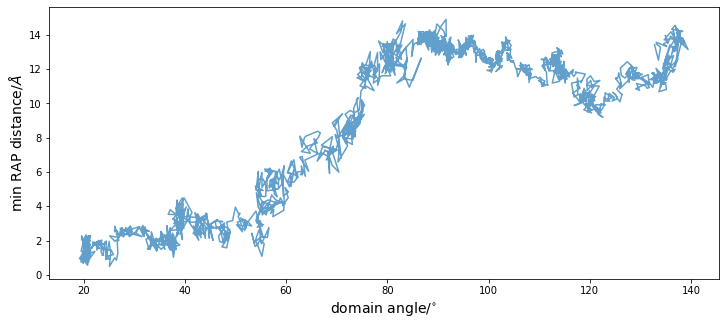

In [63]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(domain_angle, rap_clashes, alpha=0.7)
ax.set_xlabel('domain angle/$^{\circ}$', size=14)
ax.set_ylabel('min RAP distance/$\AA$', size=14)

fig.savefig('domain_angle_RAP.png', dpi=300)

## 3. Hinge and PBC Hbonds

[top](#Supplementary-Information)

In [25]:
colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
hatches = ['..', 'xx', 'o', '-', '|']
locations = ['../systems/apo/active/seeded-md_2step', '../systems/cAMP/active/seeded-md_2step',
             '../systems/L273W/active/seeded-md_2step', '../systems/I942/active/seeded-md_2step',
             '../systems/I942/active/seeded-md_restr']

In [14]:
distances = []

for loc in locations:
    df = pd.read_csv(f'{loc}/protein_hbonds.txt', index_col=0)
    distances.append(df)

In [15]:
masks = ['GLY_222@O-ALA_225@N-H', 'GLN_223@O-VAL_227@N-H', 'LEU_226@O-LYS_258@NZ-HZ3', 'PHE_253@O-LYS_258@N-H', 'GLU_261@OE2-ALA_262@N-H', 'GLU_261@O-THR_264@OG1-HG1']
titles = ['G269(O)-A272(H)', 'Q270(O)-V274(H)', 'L273(O)-K305(HZ3)', 'F300(O)-K305(H)', 'E308(OE2)-A309(H)', 'E308(O)-T311(HG1)']

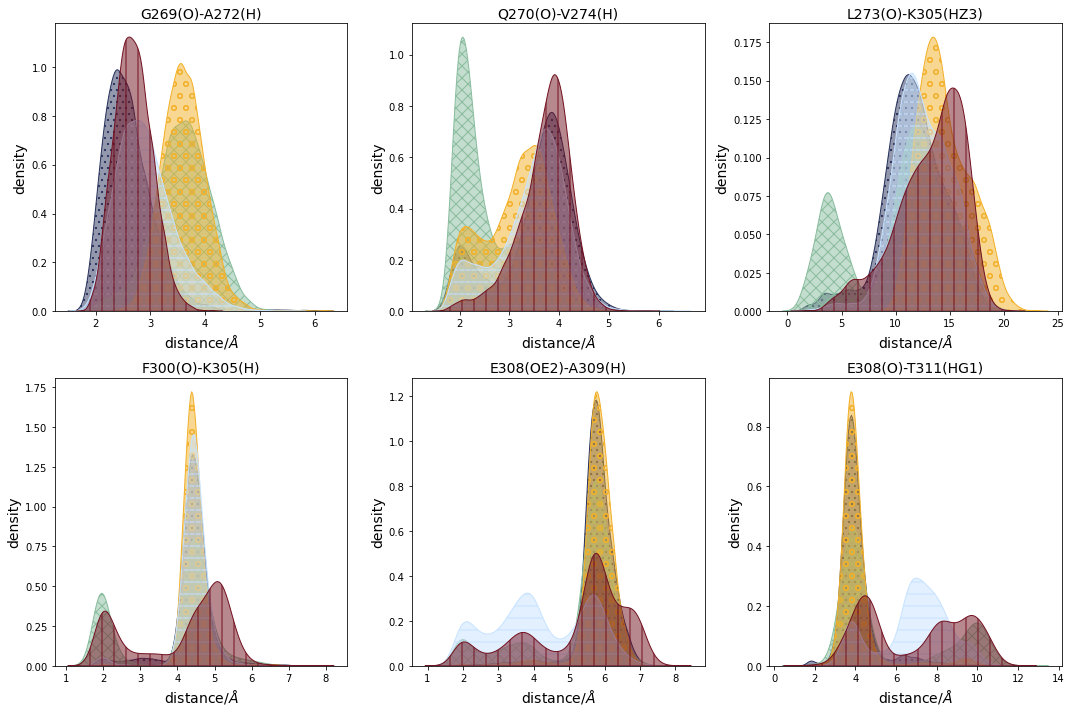

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
ax = np.hstack(ax)

for i, mask in enumerate(masks):
    for j in range(5):
        sns.kdeplot(distances[j][mask], ax=ax[i], shade=True, alpha=0.5, hatch=hatches[j], color=colors[j])
    ax[i].set_title(titles[i], size=14)
    ax[i].set_xlabel('distance/$\AA$', size=14)
    ax[i].set_ylabel('density', size=14)
    
fig.tight_layout()
fig.savefig('hbond_network.png', dpi=300)

## 4. cAMP Hbonds with L273W

[top](#Supplementary-Information)

#### Full ensemble

In [17]:
l273w_hbonds = pd.read_csv('../systems/L273W/active/seeded-md_2step/L273W_hbonds.txt', delim_whitespace=True).iloc[:,1:]

In [18]:
bonds = [['G269', 'R279', 'A280', 'A281'], ['K353', 'E315']]

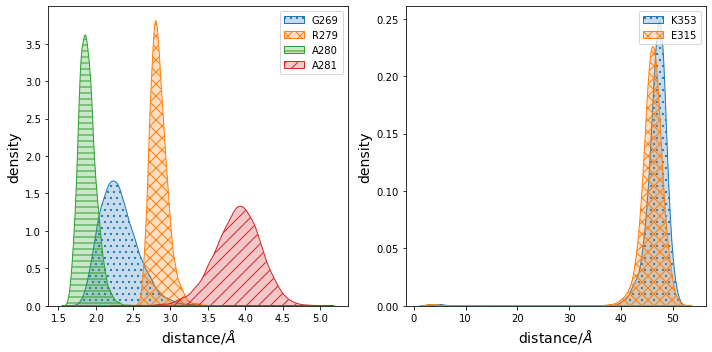

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

hatches = ['..', 'xx', '--', '//']

for i in range(2):
    for j in range(len(bonds[i])):
        sns.kdeplot(l273w_hbonds[bonds[i][j]], ax=ax[i], shade=True, hatch=hatches[j], label=bonds[i][j])
    ax[i].set_xlabel('distance/$\AA$', size=14)
    ax[i].set_ylabel('density', size=14)
    ax[i].legend()

fig.tight_layout()
fig.savefig('L273W_hbonds.png', dpi=300)

#### Active state only

In [20]:
l273w_hbonds_active = pd.read_csv('../systems/L273W/active/seeded-md_2step/L273W_hbonds_active.txt', delim_whitespace=True).iloc[:,1:]

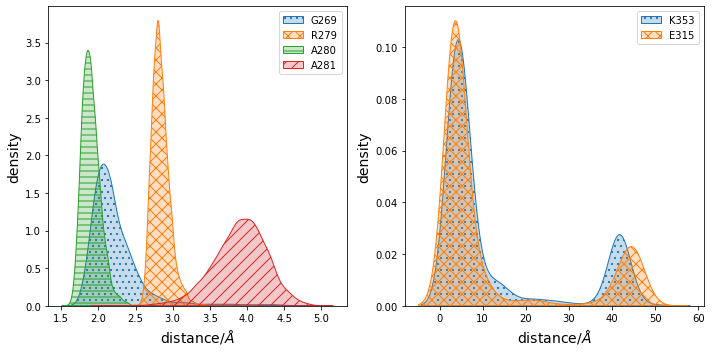

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

hatches = ['..', 'xx', '--', '//']

for i in range(2):
    for j in range(len(bonds[i])):
        sns.kdeplot(l273w_hbonds_active[bonds[i][j]], ax=ax[i], shade=True, hatch=hatches[j], label=bonds[i][j])
    ax[i].set_xlabel('distance/$\AA$', size=14)
    ax[i].set_ylabel('density', size=14)
    ax[i].legend()

fig.tight_layout()
fig.savefig('L273W_hbonds_active.png', dpi=300)

## 5. I942 internal dihedrals

[top](#Supplementary-Information)

In [46]:
i942_dih = pd.read_csv('../systems/I942/active/seeded-md_2step/internal_dih.txt', delim_whitespace=True).iloc[:,1:]
i942r_dih = pd.read_csv('../systems/I942/active/seeded-md_restr/internal_dih.txt', delim_whitespace=True).iloc[:,1:]

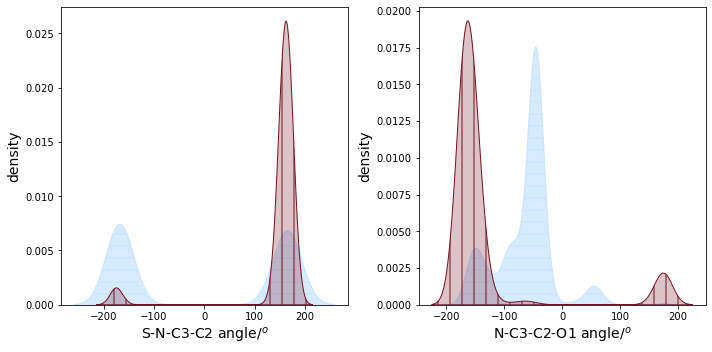

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

labels = ['S-N-C3-C2', 'N-C3-C2-O1']

colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
hatches = ['..', 'xx', 'o', '-', '|']

for i in range(2):
    sns.kdeplot(i942_dih.iloc[:,i], ax=ax[i], shade=True, hatch=hatches[3], color=colors[3], alpha=0.7)
    sns.kdeplot(i942r_dih.iloc[:,i], ax=ax[i], shade=True, hatch=hatches[4], color=colors[4])
    ax[i].set_xlabel('%s angle/$^{o}$'%labels[i], size=14)
    ax[i].set_ylabel('density', size=14)
    
fig.tight_layout()
fig.savefig('I942_internal.png', dpi=300, bbox_inches='tight')